## Import The Dependencies
 What to do Initially
 


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

## Data Collection and Processing

Loading the DataSet from csv file

In [5]:
car_dataset=pd.read_csv('car data.csv')

#### Checking the initial values of our DataFrame

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Checking some last values of our DataFrame

In [8]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


#### Checking the total rows and columns of the DataFrame

In [10]:
car_dataset.shape

(301, 9)

### Skeleton of the DataSet

In [11]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# if your dataset have some missing values you can check all of them by using this function
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Checking the Distribution of the dataset

In [20]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### For the shake of understanding of the Machine Learning Algorithm we convert string values into some numeric values(Encoding the Data)
##### Fuel_Type , Seller_Type,Transmission

In [21]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [22]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data and Target

In [24]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [25]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [26]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting Training Data and Test Data

##### Training Data--> X_train, Price of Training Data-->X_test
##### Training Data--> Y_train ,Price of Data-->Y_Test

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Training Of Model Using  Linear Regression 

In [28]:
lin_reg_model=LinearRegression()

In [29]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

#### Prediction on Training Data

In [30]:
training_data_predcition=lin_reg_model.predict(X_train)

#### R^2 Error (Coefficient of Determination)

In [32]:
error_score=metrics.r2_score(Y_train,training_data_predcition)
print("R square Error : ",error_score)

R square Error :  0.8799451660493706


### Visualise the Actual Values and Predicted Values

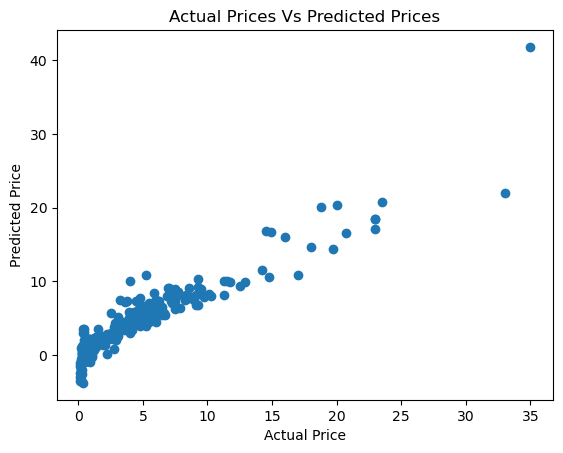

In [33]:
plt.scatter(Y_train,training_data_predcition)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

#### Prediction on Test Data

In [34]:
test_data_predcition=lin_reg_model.predict(X_test)

### R^2 Error

In [38]:
error_score=metrics.r2_score(Y_test,test_data_predcition)
print("R square Error : ",error_score)

R square Error :  0.8365766715025404


### Visualise the Actual Values and Predicted Values

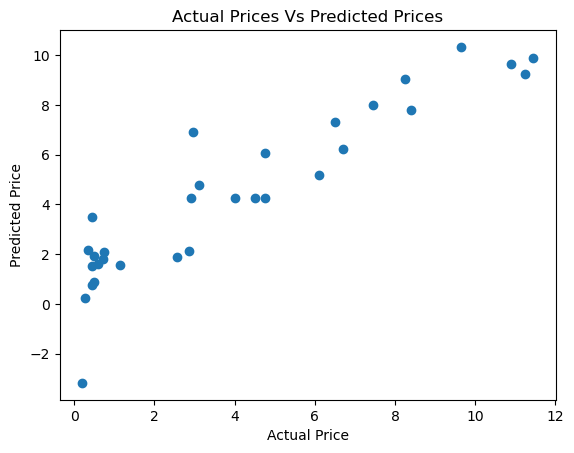

In [39]:
plt.scatter(Y_test,test_data_predcition)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

# Training Of Model Using Lasso Regression

#### Lasso Regression perform better in most of the cases than Linear Regression Model

In [43]:
lass_reg_model=Lasso()

In [44]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

### Model Evaluation
#### Prediction on Training Data

In [45]:
training_data_predcition=lass_reg_model.predict(X_train)

### R^2 Error

In [46]:
error_score=metrics.r2_score(Y_train,training_data_predcition)
print("R square Error : ",error_score)

R square Error :  0.8427856123435794


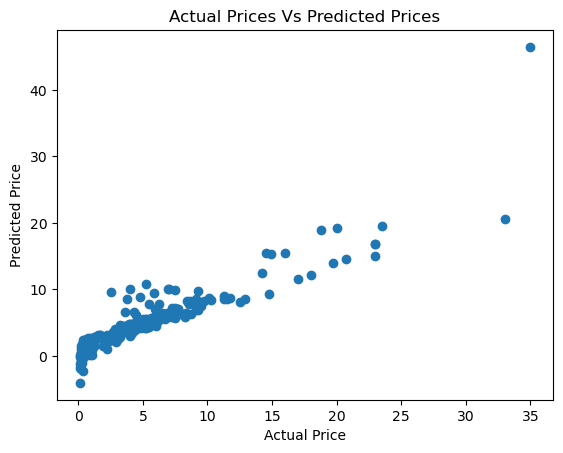

In [47]:
plt.scatter(Y_train,training_data_predcition)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

### Model Evaluation
#### Prediction on Test Data

In [48]:
test_data_predcition=lass_reg_model.predict(X_test)

### R^2 Error

In [49]:
error_score=metrics.r2_score(Y_test,test_data_predcition)
print("R square Error : ",error_score)

R square Error :  0.8709167941173195


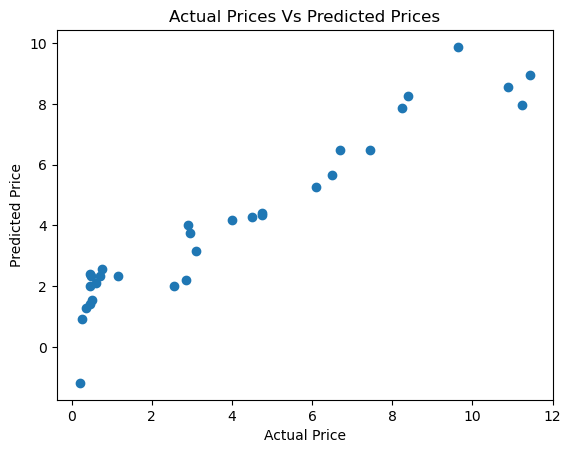

In [50]:
plt.scatter(Y_test,test_data_predcition)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

My project involves predicting car selling prices using machine learning techniques. I started by loading and preprocessing the dataset, converting categorical features into numerical values, and splitting the data into training and test sets. Then I applied two regression models: Linear Regression and Lasso Regression. Lasso Regression, with its regularization, demonstrated better performance on both training and test data, making it a preferred choice for your predictive modeling. I assessed the model's accuracy using R-squared scores and visualized the actual vs. predicted prices.My Mini project successfully showcases how Lasso Regression can be a valuable tool for predicting car selling prices, providing a robust and interpretable model for the task.

# Training Of Model Using Random forest

In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=2) 
rf_model.fit(X_train, Y_train)




RandomForestRegressor(random_state=2)

### Model Evaluation
#### Prediction on Training Data¶

In [54]:

rf_training_data_prediction = rf_model.predict(X_train)

rf_training_error_score = metrics.r2_score(Y_train, rf_training_data_prediction)
print("Random Forest Training R square Error: ", rf_training_error_score)



Random Forest Training R square Error:  0.9883896196080834


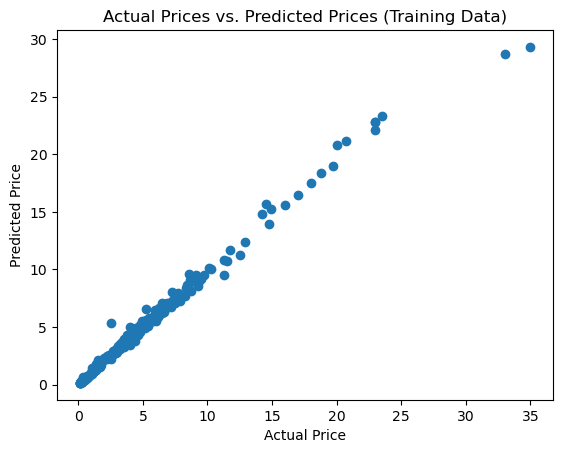

In [55]:
# Visualize the Actual Values and Predicted Values for Training Data
plt.scatter(Y_train, rf_training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs. Predicted Prices (Training Data)")
plt.show()



### Model Evaluation
#### Prediction on Test Data¶

In [56]:
rf_test_data_prediction = rf_model.predict(X_test)



In [57]:
rf_test_error_score = metrics.r2_score(Y_test, rf_test_data_prediction)
print("Random Forest Test R square Error: ", rf_test_error_score)



Random Forest Test R square Error:  0.9812700527143337


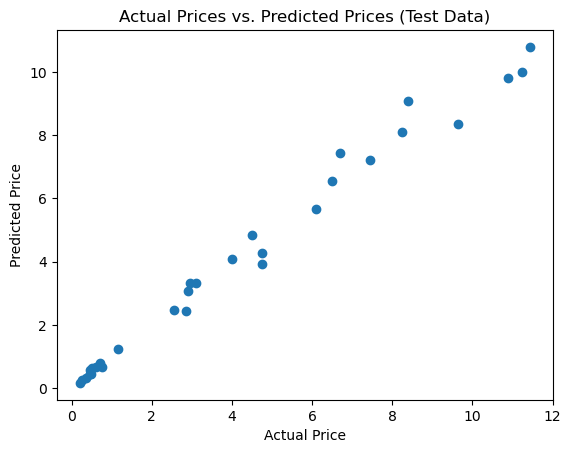

In [58]:
plt.scatter(Y_test, rf_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs. Predicted Prices (Test Data)")
plt.show()

# COMPARISION
### Based on the R^2 scores we get above, the Random Forest Regression model (RF) with an R^2 score of 0.981 is the best-performing model in terms of prediction accuracy above specific dataset and problem. It significantly outperforms both Lasso Regression and Linear Regression, which have lower R^2 scores.

### Therefore, forabove dataset, the Random Forest Regression model is the best choice for making accurate predictions.